# uggh

In [17]:
## bigger uggh

In [8]:
import time
import functools
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [12]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

Using TensorFlow backend.


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
%matplotlib inline

In [16]:
col_names = [
    'elevation',
    'aspect',
    'slope',
    'h_dist_hydro',
    'v_dist_hydro',
    'h_dist_road',
    'shade_9am',
    'shade_noon',
    'shade_3pm',
    'h_dist_fire'
]

col_names += ['wild_' + str(i) for i in range(4)]
col_names += ['soil_' + str(i) for i in range(40)]
col_names.append('cover_type')


In [22]:
import gzip


In [ ]:
import shutil
with gzip.open('file.txt.gz', 'rb') as f_in, open('file.txt', 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

In [23]:
df = pd.read_csv('covtype.data.gz', names = col_names)

In [26]:
df.head

<bound method NDFrame.head of         elevation  aspect  slope  h_dist_hydro  v_dist_hydro  h_dist_road  \
0            2596      51      3           258             0          510   
1            2590      56      2           212            -6          390   
2            2804     139      9           268            65         3180   
3            2785     155     18           242           118         3090   
4            2595      45      2           153            -1          391   
5            2579     132      6           300           -15           67   
6            2606      45      7           270             5          633   
7            2605      49      4           234             7          573   
8            2617      45      9           240            56          666   
9            2612      59     10           247            11          636   
10           2612     201      4           180            51          735   
11           2886     151     11           371

In [27]:
df.describe()

,elevation,aspect,slope,h_dist_hydro,v_dist_hydro,h_dist_road,shade_9am,shade_noon,shade_3pm,h_dist_fire,...,soil_31,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,cover_type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [28]:
df = df.sample(frac=1)

In [29]:
# get X and Y
X = df.values[:-7]
Y = df.values[:,-7:]

In [30]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

C:\Users\chris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
Y.mean(axis=0)

array([  3.25466600e-03,   2.04815047e-04,   5.12898185e-04,
         2.68032330e-02,   2.37619877e-02,   1.50599299e-02,
         2.05147054e+00])

In [32]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,...,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000,581005.000000
mean,0.550458,0.432380,0.213692,0.192861,0.283486,0.330218,0.835221,0.879208,0.561135,0.276077,...,0.090393,0.077717,0.002773,0.003255,0.000205,0.000513,0.026802,0.023761,0.015058,0.175243
std,0.140061,0.310871,0.113458,0.152146,0.075315,0.219089,0.105393,0.077829,0.150686,0.184609,...,0.286745,0.267726,0.052584,0.056957,0.014310,0.022642,0.161504,0.152302,0.121785,0.232748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
from keras.optimizers import SGD, Adam


class Bandit_SGD(SGD):
    """Stochastic gradient descent optimizer for contextual bandits.
    Includes support for momentum,
    learning rate decay, and Nesterov momentum.
    # Arguments
        n_arms: int >0. Number of arms.
        explore: float [0., .5] Exploration parameter.
        lr: float >= 0. Learning rate.
        momentum: float >= 0. Parameter updates momentum.
        decay: float >= 0. Learning rate decay over each update.
        nesterov: boolean. Whether to apply Nesterov momentum.
    """
    
    def __init__(self, n_arms=2., explore=.1, **kwargs):
        super(Bandit_SGD, self).__init__(**kwargs)
        self.n_arms = K.variable(n_arms, name='n_arms')
        self.explore = K.variable(explore, name='explore')
    
    def get_updates(self, params, constraints, loss):
        grads = self.get_gradients(loss, params)
        self.updates = []

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * self.iterations))
            self.updates .append(K.update_add(self.iterations, 1))
        
        # weight scaling for bandits
        P = (1. - self.explore) + self.explore / self.n_arms
        # momentum
        shapes = [K.get_variable_shape(p) for p in params]
        moments = [K.zeros(shape) for shape in shapes]
        self.weights = [self.iterations] + moments
        for p, g, m in zip(params, grads, moments):
            # apply bandit scaling
            g =  g/P
            v = self.momentum * m - lr * g  # velocity
            self.updates.append(K.update(m, v))

            if self.nesterov:
                new_p = (p + self.momentum * v - lr * g)
            else:
                new_p = (p + v)

            # apply constraints
            if p in constraints:
                c = constraints[p]
                new_p = c(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates
    
class Bandit_Adam(Adam):
    """Adam optimizer for contextual bandits
    Default parameters follow those provided in the original paper.
    # Arguments
        n_arms: int >0. Number of arms.
        explore: float [0., .5] Exploration parameter.
        lr: float >= 0. Learning rate.
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor.
        decay: float >= 0. Learning rate decay over each update.
    # References
        - [Adam - A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8)
    """

    def __init__(self, n_arms=2., explore=.1, **kwargs):
        super(Bandit_Adam, self).__init__(**kwargs)
        self.n_arms = K.variable(n_arms, name='n_arms')
        self.explore = K.variable(explore, name='explore')
        

    def get_updates(self, params, constraints, loss):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * self.iterations))

        t = self.iterations + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        shapes = [K.get_variable_shape(p) for p in params]
        ms = [K.zeros(shape) for shape in shapes]
        vs = [K.zeros(shape) for shape in shapes]
        self.weights = [self.iterations] + ms + vs
        # weight scaling for bandits
        P = (1. - self.explore)*(loss > -0.6931471805599453) + self.explore / self.n_arms
        
        for p, g, m, v in zip(params, grads, ms, vs):
            # apply bandit scaling
            g = g/P
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))

            new_p = p_t
            # apply constraints
            if p in constraints:
                c = constraints[p]
                new_p = c(new_p)
            self.updates.append(K.update(p, new_p))
        return self.updates

In [34]:
# mlp factory

def build_experts(n, input_shape, n_hidden, n_layers):
    # builds a committee of experts
    def build_expert():
        model = Sequential()
        # add hidden layers
        for layer in range(n_layers):
            model.add(Dense(n_hidden,
                            kernel_initializer='glorot_uniform',
                            activation='relu',
                            input_dim=input_shape,
                            kernel_regularizer=regularizers.l2(0.01)))
        # output layer
        model.add(Dense(1,
                        kernel_initializer='glorot_normal',
                        activation='sigmoid',
                        kernel_regularizer=regularizers.l2(0.01)))
        return model
    experts = [build_expert() for i in range(n)]
    return experts

experts = build_experts(4, X.shape[1], 32, 1)
experts[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [35]:
def compile_experts(experts, optimizer, loss, **kwargs):
    # compiles a commitee of experts
    n_arms = len(experts)
    def compile_expert(expert, **kwargs):
        expert.compile(optimizer=optimizer,
                      loss=loss)
        return expert
    compiled_experts = [compile_expert(expert) for expert in experts]
    return compiled_experts

# test it out
experts = compile_experts(experts, 'adam', 'binary_crossentropy', explore=.1)
experts

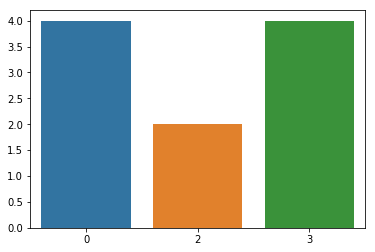

In [36]:
# chooses an arm as in Algorithm 1
def choose_arm(x, experts, explore):
    n_arms = len(experts)
    # make predictions
    preds = [expert.predict(x) for expert in experts]
    # get best arm
    arm_max = np.nanargmax(preds)
    # create arm selection probabilities
    P = [(1-explore)*(arm==arm_max) + explore/n_arms for arm in range(n_arms)]
    # select an arm
    chosen_arm = np.random.choice(np.arange(n_arms), p=P)
    pred = preds[chosen_arm]
    return chosen_arm, pred

# quick test
starting_arms = pd.value_counts([choose_arm(X[[np.random.choice(range(X.shape[0]))]], experts, explore=.5)[0] for i in range(10)])
sns.barplot(starting_arms.index, starting_arms.values);

In [37]:
def run_bandit_1(X, Y, explore, exp_annealing_rate=1, min_explore=.005, **kwargs):
    n, n_arms = Y.shape
    input_shape = X.shape[1]
    experts = build_experts(n_arms, input_shape, 32, 1)
    experts = compile_experts(experts, **kwargs)
    # trace for arm choices
    chosen_arms = []
    # trace for regrets
    regrets = []
    true_rewards = []
    
    start_time = time.time()
    message_iteration = 10
    print(f'Starting bandit\n----------\nN_arms: {n_arms}\n----------\n')
    for i in range(n):
        context = X[[i]]
        chosen_arm, pred = choose_arm(context, experts, explore)
        reward = Y[i, chosen_arm]
        max_reward = np.max(Y[i])
        max_arm = np.argmax(Y[i])
        true_rewards.append(max_arm)
        expert = experts[chosen_arm]
        expert.fit(context, np.expand_dims(reward, axis=0), epochs=1, verbose=0)
        experts[chosen_arm] = expert
        chosen_arms.append(chosen_arm)
        regret = max_reward - reward
        regrets.append(regret)
        if explore > min_explore:
            explore *= exp_annealing_rate
        if (i % message_iteration == 0) and (i > 0):
            if message_iteration <= 1e4:
                message_iteration *= 10
            elapsed = time.time() - start_time
            remaining = (n*elapsed/i - elapsed)/60
            print(f'''Completed iteration: {i}
            Elapsed time: {elapsed:.2f} seconds
            Estimated time remaining: {remaining:.2f} minutes
            --------------------''')
    elapsed = (time.time() - start_time)/60
    print(f'Finished in: {elapsed:.2f} minutes')
    return experts, chosen_arms, true_rewards, regrets

In [38]:
# sample run
n_points = 100

fit_models_1, arm_hist_1, true_reward_hist_1, regret_hist_1 = run_bandit_1(X[:n_points], Y[:n_points], optimizer='adam', 
                                                                           loss='binary_crossentropy', explore=.005, exp_annealing_rate=1, clipnorm=1.)

Starting bandit
----------
N_arms: 7
----------

Completed iteration: 10
            Elapsed time: 2.83 seconds
            Estimated time remaining: 0.43 minutes
            --------------------
Finished in: 0.08 minutes


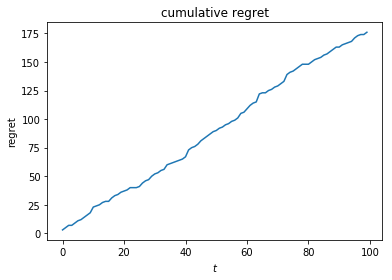

In [44]:
plt.plot(np.cumsum(regret_hist_1))
plt.title('cumulative regret')
plt.xlabel('$t$')
plt.ylabel('regret');

In [40]:
# true best arms
pd.value_counts(true_reward_hist_1)

6    94
3     5
5     1
dtype: int64

In [41]:
# chosen arms
pd.value_counts(arm_hist_1)

3    36
4    20
1    16
0    14
2     8
6     4
5     2
dtype: int64

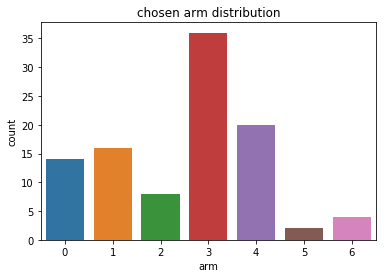

In [42]:
sns.barplot(pd.value_counts(arm_hist_1).index, pd.value_counts(arm_hist_1).values)
plt.title('chosen arm distribution')
plt.ylabel('count')
plt.xlabel('arm');

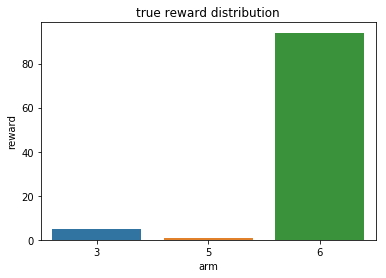

In [45]:
sns.barplot(pd.value_counts(true_reward_hist_1).index, pd.value_counts(true_reward_hist_1).values)
plt.title('true reward distribution')
plt.ylabel('reward')
plt.xlabel('arm');

In [46]:
# neural bandit 2

# get shapes and number of arms
n, n_arms = Y.shape
input_shape = X.shape[1]

# init models
# 32 hidden units, 1 hidden layer, explore = .005
model_1 = build_experts(n_arms, input_shape, n_hidden=32, n_layers=1)
model_1 = compile_experts(model_1, loss='binary_crossentropy', optimizer='adam')

# 64 hidden units, 1 hidden layer, explore = .005
model_2 = build_experts(n_arms, input_shape, n_hidden=64, n_layers=1)
model_2 = compile_experts(model_2, loss='binary_crossentropy', optimizer='adam')

# 128 hidden units, 1 hidden layer, explore = .005
model_3 = build_experts(n_arms, input_shape, n_hidden=128, n_layers=1)
model_3 = compile_experts(model_3, loss='binary_crossentropy', optimizer='adam')


# 64 hidden units, 2 hidden layers, explore = .005
model_4 = build_experts(n_arms, input_shape, n_hidden=64, n_layers=2)
model_4 = compile_experts(model_4, loss='binary_crossentropy', optimizer='adam')


# 64 hidden units, 2 hidden layers, explore = .005
model_5 = build_experts(n_arms, input_shape, n_hidden=128, n_layers=2)
model_5 = compile_experts(model_5, loss='binary_crossentropy', optimizer='adam')


# 32 hidden units, 1 hidden layer, annealing_explore
model_6 = build_experts(n_arms, input_shape, n_hidden=32, n_layers=1)
model_6 = compile_experts(model_6, loss='binary_crossentropy', optimizer='adam')

# 64 hidden units, 1 hidden layer, annealing_explore
model_7 = build_experts(n_arms, input_shape, n_hidden=64, n_layers=1)
model_7 = compile_experts(model_7, loss='binary_crossentropy', optimizer='adam')

# 128 hidden units, 1 hidden layer, annealing_explore
model_8 = build_experts(n_arms, input_shape, n_hidden=128, n_layers=1)
model_8 = compile_experts(model_8, loss='binary_crossentropy', optimizer='adam')


# 64 hidden units, 2 hidden layers, annealing_explore
model_9 = build_experts(n_arms, input_shape, n_hidden=64, n_layers=2)
model_9 = compile_experts(model_9, loss='binary_crossentropy', optimizer='adam')


# 64 hidden units, 2 hidden layers, annealing_explore
model_10 = build_experts(n_arms, input_shape, n_hidden=128, n_layers=2)
model_10 = compile_experts(model_10, loss='binary_crossentropy', optimizer='adam')

In [47]:
# set n_steps and model exploration parameter
n_steps = 100
gamma_model=.1

# collect models, only 4 in the interest of time
models = [model_2, model_4, model_7, model_9]
n_models = len(models)
# init weight vector
weights = np.ones(n_models)
# init model explore parameters
explores = np.array([.005]*2 + [.5]*2)
anneal = np.array([False]*2 + [True]*2)
annealing_rate = .99995
min_explore = .005

def get_model_probabilities(weights, gamma_model):
    # get probabilites of choosing each model
    p = np.array([(1-gamma_model)*weight/sum(weights) + gamma_model/n_models for weight in weights])
    return p

def choose_model(weights, gamma_model, model_probabilities):
    # choose a model based on weights
    n_models = len(weights)
    model = np.random.choice(np.arange(n_models), p=model_probabilities)
    return model

# init histories
arm_hist_2 = []
model_hist_2 = []
regret_hist_2 = []
weight_hist_2 = []

# init timing vars
start_time = time.time()
next_check = 1

# train the models
for step in range(n_steps):
    # store weights
    weight_hist_2.append(weights)
    # get probs and choose a model
    p = get_model_probabilities(weights, gamma_model)
    chosen_model = choose_model(weights, gamma_model, p)
    # store model choice
    model_hist_2.append(chosen_model)
    # get a random data point
    i = np.random.randint(X.shape[0])
    context = X[[i]]
    # choose an arm
    chosen_arm, pred = choose_arm(context, models[chosen_model], explores[chosen_model])
    # store arm selection
    arm_hist_2.append(chosen_arm)
    # observe reward and max reward
    reward = Y[i, chosen_arm]
    max_reward = np.max(Y[i])
    # calculate and store regret
    regret = max_reward - reward
    regret_hist_2.append(regret)
    # update the chosen arm for each model
    for m, model in enumerate(models):
        expert = model[chosen_arm]
        expert.fit(context, np.expand_dims(reward, axis=0), epochs=1, verbose=0)
        model[chosen_arm] = expert
        # anneal explore param if necessary
        if (anneal[m]) and (explores[m] > min_explore):
            explores[m] *= annealing_rate
    # update weights
    weights[chosen_model] = weights[chosen_model]*np.exp((gamma_model*reward/(p[chosen_model]*n_models)))
    # print progress
    if step == next_check:
        elapsed = time.time()-start_time
        print(f'Step {step} complete in {elapsed} seconds.')
        next_check *= 2

Step 1 complete in 14.9386568069458 seconds.
Step 2 complete in 16.71857786178589 seconds.
Step 4 complete in 22.91658353805542 seconds.
Step 8 complete in 38.36069464683533 seconds.
Step 16 complete in 43.93818473815918 seconds.
Step 32 complete in 44.08518862724304 seconds.
Step 64 complete in 44.354464054107666 seconds.


In [48]:
# TensorFlow version of Neural Bandit 1

N_EXPERTS = 7
N_FEATURES = X.shape[1]
N_HIDDEN = 128
MAX_STEPS = len(X)
START_EXPLORE = np.array([.005])

graph2 = tf.Graph()
with graph2.as_default():
    
    # placeholders for inputs, rewards
    context = tf.placeholder(tf.float32,
                             shape=[None, N_FEATURES],
                             name='context')
    reward = tf.placeholder(tf.float32,
                            shape=[None, N_EXPERTS],
                            name='reward')
    
    # setting the exploration parameter and annealing rate
    global_step = tf.Variable(0, name='global_step', trainable=False)
    
    start_explore = tf.constant(dtype=tf.float32,
                          name='explore',
                          shape=[1],
                          value=START_EXPLORE)
    min_explore = tf.constant([.005],
                              dtype=tf.float32,
                              name='min_explore')
    
    explore_anneal = tf.constant([.99995],
                                 dtype=tf.float32,
                                 name='explore_annealing_rate')
    
    explore = start_explore * tf.pow(explore_anneal, tf.to_float(global_step + 1))
    
    explore = tf.maximum(explore, min_explore)
    
    
    # initializing regret
    cum_regret = tf.Variable([0], dtype=tf.int32, name='regret', trainable=False)
    
    
    def build_arm_network(activations, n_hidden):
        W1 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=.1),
                        dtype=tf.float32,
                        name='W1',)
        B1 = tf.Variable(tf.truncated_normal([n_hidden], stddev=.1),
                        dtype=tf.float32,
                        name='B1')
        W2 = tf.Variable(tf.truncated_normal([n_hidden, 1], stddev=.1),
                         dtype=tf.float32,
                         name='W2')
        B2 = tf.Variable(tf.truncated_normal([1], stddev=.1),
                         dtype=tf.float32,
                         name='B2')
        h1 = tf.matmul(activations, W1) + B1
        a1 = tf.nn.relu(h1)
        h2 = tf.matmul(a1, W2) + B2
        return h2
    
    def loss_fn(target, y_hat):
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=target,
                                                            logits=y_hat,
                                                            name='xentropy')
        loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
        return loss
    
    # dense layer variables
    W_shared = tf.Variable(tf.truncated_normal([N_FEATURES, N_HIDDEN], stddev=.1),
                           dtype=tf.float32,
                           name='shared_weights',)

    B_shared = tf.Variable(tf.truncated_normal([N_HIDDEN], stddev=.1),
                           dtype=tf.float32,
                           name='shared_biases')
    
    h_shared = tf.matmul(context, W_shared) + B_shared
    a_shared = tf.nn.relu(h_shared)
    
    y_hats = []
    for exp in range(N_EXPERTS):
        
        # arm networks
        with tf.variable_scope('arm_'+str(exp)):
            h = build_arm_network(a_shared, N_HIDDEN)
            y_hat = tf.nn.sigmoid(h, name='y_hat')
            y_hats.append(y_hat)
            loss = loss_fn(tf.slice(reward, begin=[0, exp], size=[1, 1]), y_hat)

            # track losses
            tf.summary.scalar('loss', loss)
        
        
    # aggregate predictions for epsilon greedy
    y_hats = tf.squeeze(tf.concat(y_hats, axis=0))
    
    # epsilon greedy arm choice
    best_arm = tf.arg_max(y_hats, dimension=0)
    best_arm_probs = tf.expand_dims(tf.concat([explore, 1 - explore], axis=0), 0)
    best_arm_draw = tf.squeeze(tf.multinomial(tf.log(best_arm_probs), 1))
    
    def best_arm_fn():
        return best_arm
    
    def random_arm():
        counts = tf.ones([1, N_EXPERTS])
        logs = tf.log(counts)
        return tf.squeeze(tf.multinomial(logs, 1))
    
    chosen_arm = tf.cond(tf.equal(best_arm_draw, tf.ones_like(best_arm_draw)), # condition
                                  best_arm_fn, # if True
                                  random_arm) # if False
    
    tf.summary.histogram('chosen_arms', chosen_arm)
    
    # track regret
    true_best_arm = tf.arg_max(reward, dimension=1)
    regret = tf.logical_not(tf.equal(chosen_arm, true_best_arm))
    cum_regret = tf.assign(cum_regret, (tf.add(tf.to_int32(regret), cum_regret)))
    tf.summary.scalar('cumulative_regret', tf.squeeze(cum_regret))
    
    
    # create optimizers and training ops for each arm
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    update_ops.append(cum_regret)
    with tf.control_dependencies(update_ops):
        optimizers = [tf.train.AdamOptimizer() for _ in range(N_EXPERTS)]
        
        train_ops = []
        for exp in range(N_EXPERTS):
            with tf.variable_scope('arm'+str(exp)):
                train_ops.append(optimizers[exp].minimize(loss, global_step))
    
    def train_op(arm):
        return train_ops[arm]
    
    # tensorboard logs
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter(graph=graph2, logdir='./neural_bandit_1')

    
    init_op = tf.global_variables_initializer()

Instructions for updating:
Use `argmax` instead


In [49]:
with tf.Session(graph=graph2) as sess:
    sess.run(init_op)
    for step in range(1000):
        i = np.random.randint(X.shape[0])
        feed_dict={context: X[[i]], reward: Y[[i]]}
        chosen_arm_, y_hats_= sess.run([chosen_arm, y_hats], feed_dict=feed_dict)
        if step % 100 == 0:
            summary, _, regret_, explore_ = sess.run([merged, train_op(chosen_arm_), cum_regret, explore], feed_dict=feed_dict)
            writer.add_summary(summary, step)
            print('at step {}, regret was {} and explore was {}'.format(step, regret_, explore_))
        else:
            sess.run([train_op(chosen_arm_)], feed_dict=feed_dict)

at step 0, regret was [0] and explore was [ 0.005]
at step 100, regret was [5] and explore was [ 0.005]
at step 200, regret was [10] and explore was [ 0.005]
at step 300, regret was [13] and explore was [ 0.005]
at step 400, regret was [17] and explore was [ 0.005]
at step 500, regret was [18] and explore was [ 0.005]
at step 600, regret was [22] and explore was [ 0.005]
at step 700, regret was [27] and explore was [ 0.005]
at step 800, regret was [34] and explore was [ 0.005]
at step 900, regret was [39] and explore was [ 0.005]
